In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib import style

#Paquetes para usar los algoritmos


from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler


train_df = pd.read_csv("archives/train.csv")
test_df = pd.read_csv("archives/test.csv")

combine = [train_df, test_df]


In [93]:
#Explorando la data
#1 - ¿Que atributos estan listados en el dataset?
#2 - ¿De los atributos, cuales son numericos o categoricos?
#3 - ¿Que atributos tienen data types combinadas?
#4 - ¿Que atributo puede contribuir a una mayor posibilidad de supervivencia?

#1

print(train_df.columns.values)


['Survived' 'Pclass' 'Sex' 'Age' 'SibSp' 'Parch' 'Fare' 'Embarked']


In [91]:
#2

train_df.head()

#Categorical: Survived,Sex & Embarked
#Ordinal: Pclass
#Continous: Age, Fare
#Discrete:SibSp, Parch



,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22,1,0,7,0
1,1,1,1,38,1,0,71,1
2,1,3,1,26,0,0,7,0
3,1,1,1,35,1,0,53,0
4,0,3,0,35,0,0,8,0


In [62]:
#3 

train_df.info()
print("_"*10)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
__________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1

In [63]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [64]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [65]:
#survival rate of pclass
train_df[["Pclass", "Survived"]].groupby(["Pclass"], as_index=False).mean().sort_values(by="Survived", ascending=False)



,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

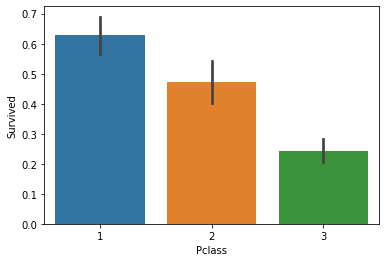

In [66]:
sns.barplot(x="Pclass", y="Survived", data=train_df )

In [67]:
train_df[["Sex","Survived"]].groupby(["Sex"], as_index=False).mean().sort_values(by="Survived",ascending= False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


<AxesSubplot:xlabel='Sex', ylabel='Survived'>

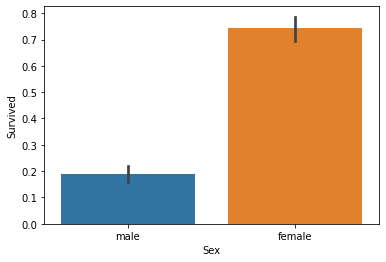

In [68]:
sns.barplot(x="Sex", y="Survived", data=train_df)

In [69]:
#cleaning data

for data in combine:
    data["Sex"] = data["Sex"].map({"female": 1, "male": 0})
    
train_df.head()
    

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S


In [94]:
#Calculando la media y desviacion estandar para randomizar las edades faltantes en la test data 

age_mean = train_df["Age"].mean()
age_std = train_df["Age"].std()

#cantidad de valores vacios

num_na = train_df["Age"].isna().sum()

#generando edades a partir de la media y la std

random_ages = age_mean + age_std * np.random.rand(num_na)

#remplazando valores

train_df.loc[train_df["Age"].isna(), "Age"] = random_ages

train_df["Age"] = train_df["Age"].astype(np.int64)

train_df.head()


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22,1,0,7,0
1,1,1,1,38,1,0,71,1
2,1,3,1,26,0,0,7,0
3,1,1,1,35,1,0,53,0
4,0,3,0,35,0,0,8,0


In [71]:
#Repetimos procedimientos en la data de test

age_t_mean = test_df["Age"].mean()
age_t_std = test_df ["Age"].std()

num_t_na = test_df["Age"].isna().sum()

random_t_ages = age_t_mean + age_t_std * np.random.randn(num_t_na)

test_df.loc[test_df["Age"].isna(), "Age"] = random_t_ages

test_df["Age"] = test_df["Age"].astype(np.int64)

test_df.tail()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,3,"Spector, Mr. Woolf",0,43,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",1,39,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",0,38,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",0,10,0,0,359309,8.0500,NaN,S
417,1309,3,"Peter, Master. Michael J",0,37,1,1,2668,22.3583,NaN,C


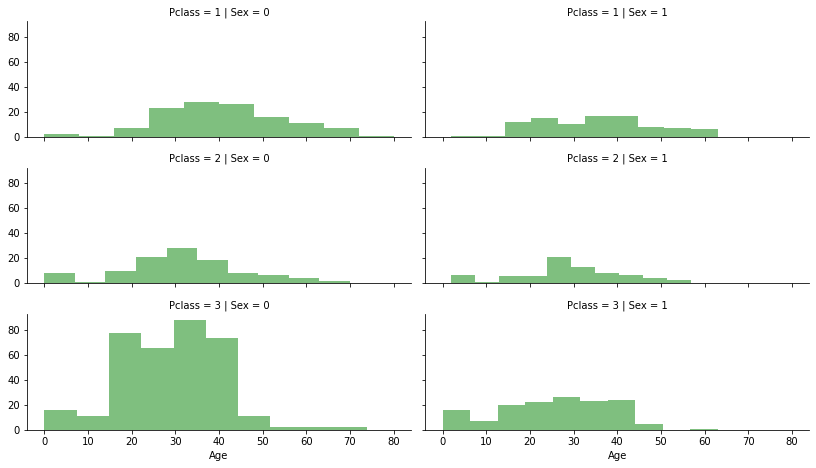

In [72]:
#Graficando

grid = sns.FacetGrid(train_df, row = "Pclass", col = "Sex", height = 2.2, aspect = 2.6)

grid.map(plt.hist, "Age", alpha =.5, bins= 10, color = "green")




In [73]:
#encontrando el puerto mas frecuente usado y eliminando los valores perdidos

port = train_df.Embarked.dropna().mode()[0]

for data in combine:
    
    data["Embarked"] = data["Embarked"].fillna(port)

train_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [74]:
train_df[["Embarked", "Survived"]].groupby(["Embarked"], as_index = False).mean().sort_values(by="Survived",ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


In [75]:
#Convirtiendo el valor categorico "Embarked" en uno numerico

for data in combine:
    data["Embarked"] = data["Embarked"].map({"S": 0 , "C": 1 , "Q" : 2 })

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22,1,0,A/5 21171,7.2500,NaN,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38,1,0,PC 17599,71.2833,C85,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26,0,0,STON/O2. 3101282,7.9250,NaN,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35,1,0,113803,53.1000,C123,0
4,5,0,3,"Allen, Mr. William Henry",0,35,0,0,373450,8.0500,NaN,0


In [88]:
#Convertir el coste de pasaje en un int

data = [train_df, test_df]

for d in data:
    d["Fare"] = d["Fare"].fillna(0)
    d["Fare"] = d["Fare"].astype(int)
    
test_df.tail()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
413,3,0,43,0,0,8,0
414,1,1,39,0,0,108,1
415,3,0,38,0,0,7,0
416,3,0,10,0,0,8,0
417,3,0,37,1,1,22,1


In [77]:
train_df = train_df.drop(columns=["PassengerId"])
train_df = train_df.drop(["Ticket","Cabin","Name"], axis =1)
test_df = test_df.drop(["Ticket", "Cabin","Name"], axis = 1)

combine = [train_df, test_df]



train_df.shape, test_df.shape

((891, 8), (418, 8))

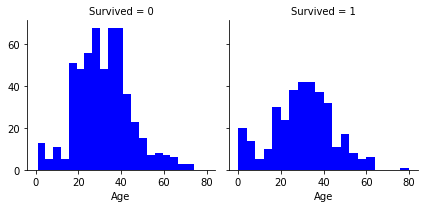

In [78]:
#Data visualization

#Age vs Survival

age_hist = sns.FacetGrid(train_df, col= "Survived")
age_hist.map(plt.hist, "Age", bins = 20, color = "Blue")

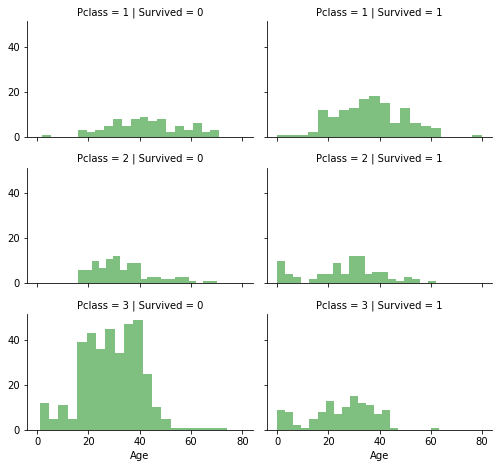

In [79]:
grid = sns.FacetGrid(train_df, col= "Survived", row = "Pclass", height= 2.2, aspect = 1.6)
grid.map(plt.hist, "Age", alpha = .5, bins = 20, color = "Green")

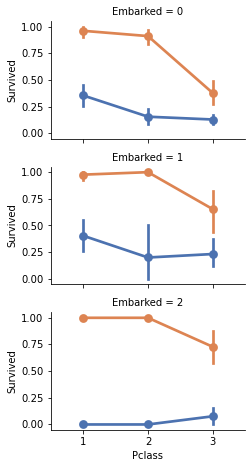

In [80]:
grid = sns.FacetGrid(train_df, row="Embarked", height = 2.2, aspect = 1.6)
grid.map(sns.pointplot, "Pclass", "Survived", "Sex", palette = "deep", order=[1,2,3], hue_order=[0,1],)

In [83]:
#Preparando la data para modelos predictivos

X_train = train_df.drop("Survived", axis = 1)
y_train = train_df["Survived"]
test_df = test_df.iloc[: , 1 : 8]
X_test


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,34,0,0,7,2
1,3,1,47,1,0,7,0
2,2,0,62,0,0,9,2
3,3,0,27,0,0,8,0
4,3,1,22,1,1,12,0
...,...,...,...,...,...,...,...
413,3,0,43,0,0,8,0
414,1,1,39,0,0,108,1
415,3,0,38,0,0,7,0
416,3,0,10,0,0,8,0


In [102]:
from sklearn.model_selection import cross_val_score, KFold
from scipy.stats import sem

#Logistic Regresion

clf_1 = Pipeline([("scaler", StandardScaler()), ("logisticregression", LogisticRegression())])


def evaluate_cross_validation(clf, X, y):
    
    # create a k-fold cross validation iterator of k=5 folds
    cv = KFold(shuffle=True, random_state=0)
    
    # by default the score used is the one returned by score >>> method of the estimator (accuracy)
    scores = cross_val_score(clf, X, y, cv=cv)
    
    print(scores)
    print(f"Mean score: {np.mean(scores)} +/- {sem(scores)}")
    

evaluate_cross_validation(clf_1, X_train, y_train)


[0.79888268 0.78089888 0.80337079 0.80337079 0.79775281]
Mean score: 0.7968551879982424 +/- 0.004149857716784104


In [103]:
#Decision Tree Classifier

for i in range(3,20):

    clf_2 = DecisionTreeClassifier(max_depth=i)
    clf_2 = clf_2.fit(X_train, y_train)
    print("Depth: ", i)
    depth.append((i,evaluate_cross_validation(clf_2, X_train, y_train)))



Depth:  3
[0.82122905 0.80898876 0.80898876 0.78089888 0.83146067]
Mean score: 0.8103132257862029 +/- 0.008470779610904885
Depth:  4
[0.82122905 0.80337079 0.80898876 0.80337079 0.79775281]
Mean score: 0.8069424392693492 +/- 0.003989093949134112
Depth:  5
[0.81564246 0.80337079 0.81460674 0.82022472 0.78089888]
Mean score: 0.8069487163392128 +/- 0.007077692025184638
Depth:  6
[0.81005587 0.79775281 0.8258427  0.82022472 0.7752809 ]
Mean score: 0.8058313979034587 +/- 0.009011277632730826
Depth:  7
[0.81005587 0.79775281 0.83146067 0.80337079 0.78651685]
Mean score: 0.8058313979034587 +/- 0.007480226424999213
Depth:  8
[0.81564246 0.78651685 0.85393258 0.79775281 0.74157303]
Mean score: 0.799083547799887 +/- 0.01837085491161893
Depth:  9
[0.81564246 0.78651685 0.8258427  0.80337079 0.7752809 ]
Mean score: 0.8013307388111229 +/- 0.009240856360630663
Depth:  10
[0.79329609 0.7752809  0.8258427  0.80898876 0.75280899]
Mean score: 0.7912434875400163 +/- 0.012744073554350888
Depth:  11
[0.793

In [105]:
# Random Forest Classifier
clf_3 = RandomForestClassifier(n_estimators=100)
clf_3.fit(X_train, y_train)
evaluate_cross_validation(clf_3, X_train, y_train)

[0.82122905 0.7752809  0.83146067 0.78089888 0.7752809 ]
Mean score: 0.7968300797187873 +/- 0.012200666917377844


In [106]:
# K-nearest Neighbor algorithm

for i in range(2,6):
    clf_4 = KNeighborsClassifier(n_neighbors = i)
    clf_4 = clf_4.fit(X_train, y_train)
    print("Neighbors: ", i)
    depth.append((i,evaluate_cross_validation(clf_2, X_train, y_train)))

Neighbors:  2
[0.79329609 0.76404494 0.80337079 0.75842697 0.75842697]
Mean score: 0.7755131504613646 +/- 0.009507039354794683
Neighbors:  3
[0.77653631 0.75280899 0.81460674 0.76966292 0.78651685]
Mean score: 0.7800263636934279 +/- 0.01024279231465612
Neighbors:  4
[0.80446927 0.7752809  0.81460674 0.76966292 0.75842697]
Mean score: 0.7844893603665809 +/- 0.010700750046456632
Neighbors:  5
[0.79329609 0.76404494 0.81460674 0.7752809  0.7752809 ]
Mean score: 0.7845019145063084 +/- 0.008866171757494752
